<a href="https://colab.research.google.com/github/lukaszplust/NUMERICAL_METHODS/blob/main/Interpolation_MN3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

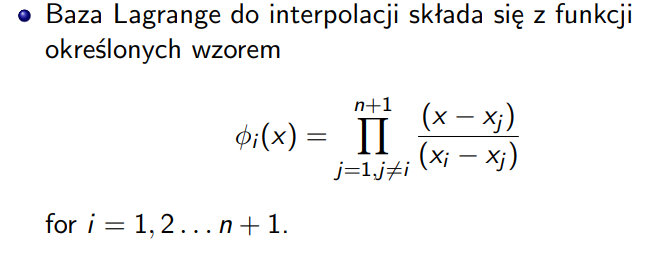

In [30]:
def lagrange_interpolate(point_x,point_y,x):
  value_interpolated = 0
  n = len(point_x)
  for i in range(n):
    fi = 1
    for j in range(n):
      if i != j:
        fi *= (x - point_x[j]) / (point_x[i] - point_x[j]) #tu może jeszcze powinno być 1.0 * przed nawiasem
    value_interpolated += (fi * point_y[i])
  return value_interpolated

In [31]:
def lagrange(value_x, point_x, point_y):
    return [lagrange_interpolate(point_x, point_y, x) for x in value_x]

Wykres

In [70]:
#value_x, value_y -> input_x, input_y, point_x, point_y -> node_x, node_y
def plot_lagrange(value_x, value_y, point_x, point_y, interpolated_x, interpolated_y):
  plt.yscale('log')
  plt.plot(value_x, value_y, '-',color ='blue', label = 'samples')
  plt.plot(interpolated_x,interpolated_y, color ='green',label = "F(x) interpoled")#funkcja interpolujaca
  plt.plot(point_x, point_y,'o',color ='orange',label = 'nodes')
  
  plt.title(f"Lagrange_Interpolation for: {str(len(point_x))} nodes")
  plt.xlabel('distance [m]')
  plt.ylabel('height [m.n.p.m]')
  plt.legend()

  save_name = "Lagrange_Interpolation for "
  save_name += str(len(point_x))
  save_name += " nodes"
  plt.savefig(f"{save_name}.png")

  plt.show()
  

Przygotowanie danych

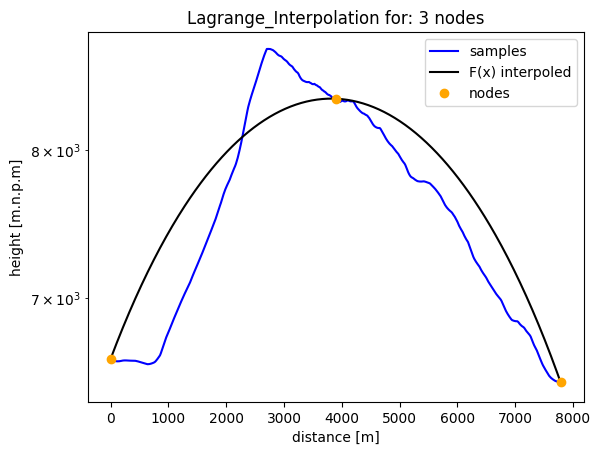

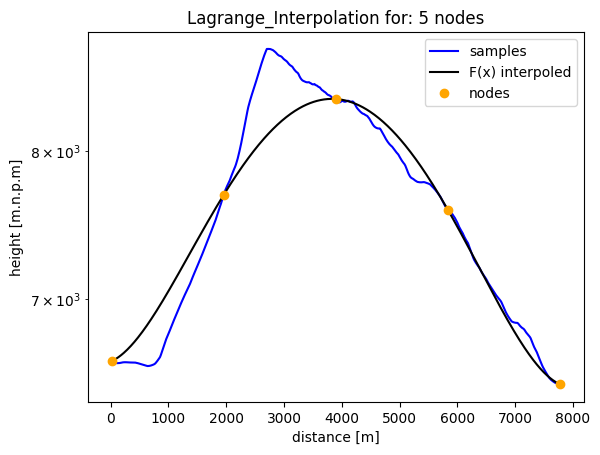

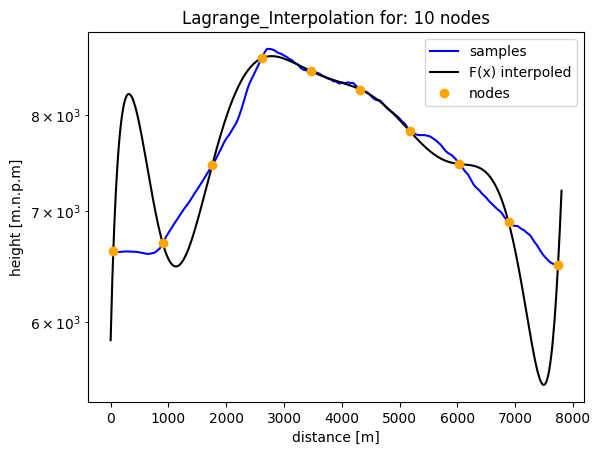

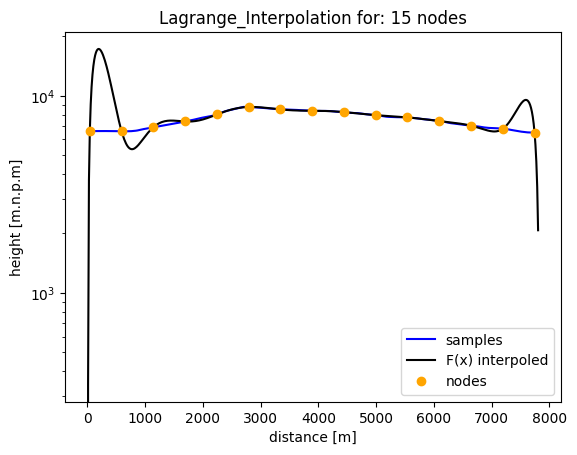

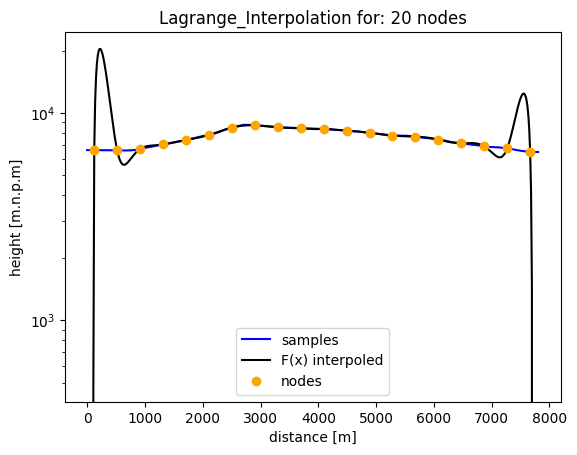

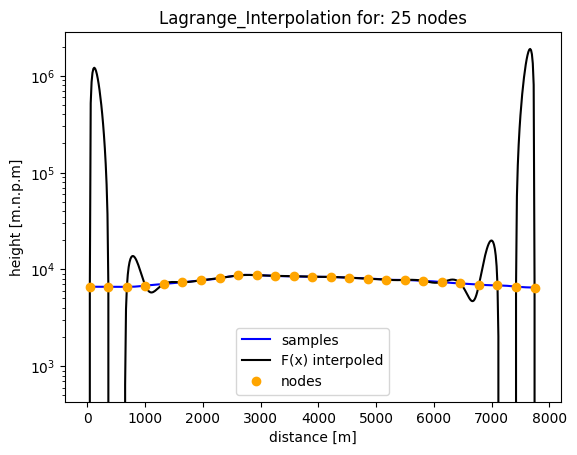

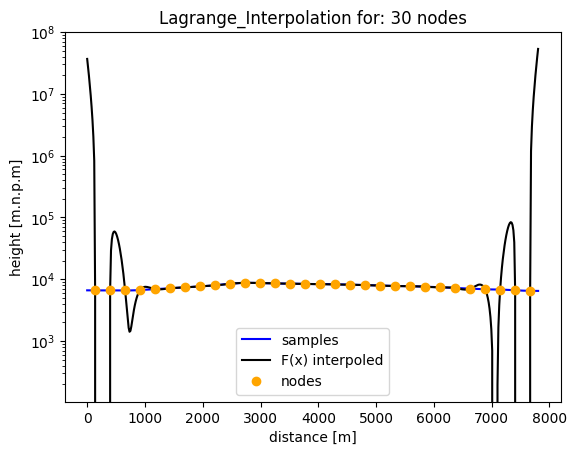

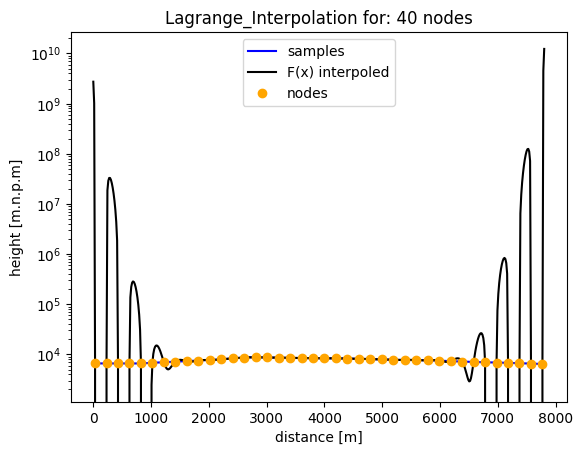

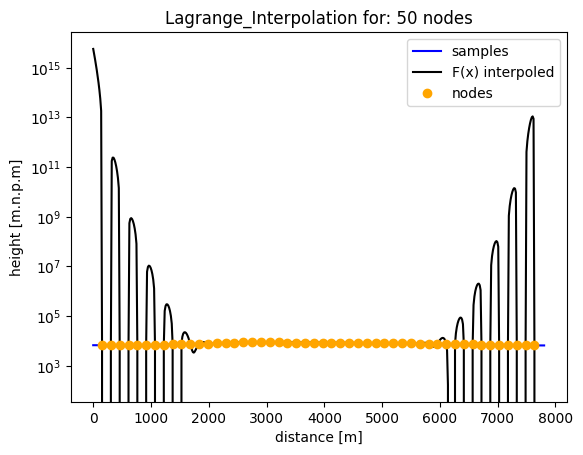

In [69]:
df = pd.read_csv('MountEverest.csv')
size = df.shape[0]# len(df.index) sample_size
nodes = [3,5,10,15,20,25,30,40,50]

for node in nodes:
  intervals = node - 1# interwal liczba - 1
  x = 1
  while intervals * (x + 1) < size:
    x += 1
  first_node = 0#zmienic na y
  while (first_node + 1) < (size - 1 - (first_node + intervals*x)):
    first_node += 1
  x_index = [first_node]
  for i in range(1, node):
    x_index.append(first_node + i * x)


  value_distance = df.iloc[:, 0].tolist()  # input distance
  value_height = df.iloc[:, 1].tolist()  # input height

  nodes_distance = []
  nodes_height = []

  for i in x_index:
    nodes_distance.append(value_distance[i])
    nodes_height.append(value_height[i])

  interpolated_lagrange = lagrange(value_distance, nodes_distance, nodes_height)
  plot_lagrange(value_distance,value_height,nodes_distance, nodes_height,value_distance,interpolated_lagrange)

Skeljny

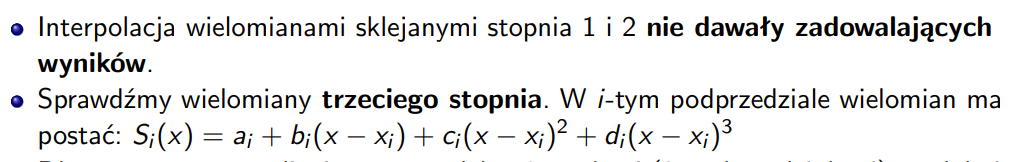

In [ ]:
def spline_interpolate(point_x, parameters,x):
      for i in range(len(point_x)-1):
        if point_x[i] <= x <= point_x[i+1]:#czy x znajduje sie pomiedzym i-tym wezłem
          h = x - point_x[i] # odległość między węzłami. Zakładam, że węzły śą równo-odległe
          a,b,c,d = parameters[i]
        
          return a + b* h + c * (h**2) + d * (h**3)#wielomian trzeciego stopnia

      return 0